# Import Dataset from local path

In [41]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [42]:
medical_df = pd.read_csv('data/insurance.csv')

In [43]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Fetch data from URL

In [44]:
from urllib.request import urlretrieve
insurance_utl = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(insurance_utl, 'data/medical_insurance.csv')


('data/medical_insurance.csv', <http.client.HTTPMessage at 0x1698ff230>)

In [45]:
medical_insurance_df = pd.read_csv('data/medical_insurance.csv')

In [46]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [47]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [48]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [49]:
sns.set_style('darkgrid')  # Set the style of the plot
matplotlib.rcParams['figure.figsize'] = (10, 6) # Set the figure size
matplotlib.rcParams['font.size'] = 14 # Set the font size
matplotlib.rcParams['figure.facecolor'] = '#00000000' # Set the figure background color


In [50]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [51]:
import nbformat
print(nbformat.__version__)


5.10.4


# Data Visulization

In [52]:
fig = px.histogram(medical_df, x='age', nbins=47, title='Age Distribution') #nbins is the number of bars in the histogram
fig.update_layout(bargap=0.1) # Update the layout of the plot
fig.show()

In [53]:
fig = px.histogram(medical_df,
                   x='bmi', 
                   marginal='violin', # Add a violin plot on the side
                   color_discrete_sequence=['green'],
                     title='BMI Distribution')
fig.update_layout(bargap=0.1)
fig.show() # it show gausss distribution because most people have normal bmi .

In [54]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['blue', 'red'],
                   title='Annual Medical Charges ')
fig.update_layout(bargap=0.1)
fig.show() # it show that smoker have high charges and ther is power law

In [55]:
fid = px.pie(medical_df,
             names='region',
             title='Distribution of Patients by Region',
             color_discrete_sequence=px.colors.sequential.RdBu)
fid.show()

In [56]:
fid = px.pie(medical_df,
             names='sex',
             title='Distribution of Patients by Sex',
             color_discrete_sequence=px.colors.sequential.RdBu_r)
fid.show()

In [57]:
fig = px.histogram(medical_df,
                   x = 'smoker',
                   color= 'sex',
                   title= 'Smoker'
)
fig.show()


In [58]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.6,
                 hover_data=['sex'],
                 title='Age vs Medical Charges')
fig.update_traces(marker_size=5)
fig.show()

In [59]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.6,
                 hover_data=['sex'],
                 title='BMI vs Medical Charges')
fig.update_traces(marker_size=5)
fig.show()

In [60]:
fig= px.violin(medical_df,
           x = 'children',
           y = 'charges',)
fig.show()

In [61]:
medical_df.charges.corr(medical_df.age) # correlation between charges and age

np.float64(0.29900819333064754)

In [62]:
medical_df.charges.corr(medical_df.bmi) # correlation between charges and bmi

np.float64(0.19834096883362884)

In [63]:
medical_df.charges.corr(medical_df.children) # correlation between charges and children

np.float64(0.0679982268479048)

In [64]:
smoker_values= {'yes':1, 'no':0}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [65]:
medical_df.charges.corr(smoker_numeric) # correlation between charges and smoker

np.float64(0.7872514304984772)

In [66]:
# Correlation Cofficent formula = cov(X,Y) / (std(X) * std(Y))
# where cov is covariance and std is standard deviation
covariance = np.cov(medical_df.charges, smoker_numeric)[0][1]
std_charges = np.std(medical_df.charges)
std_smoker = np.std(smoker_numeric)
correlation = covariance / (std_charges * std_smoker)
correlation

np.float64(0.7878402498182218)

In [67]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
medical_df.corr(numeric_only=True) # correlation matrix for all numeric columns

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


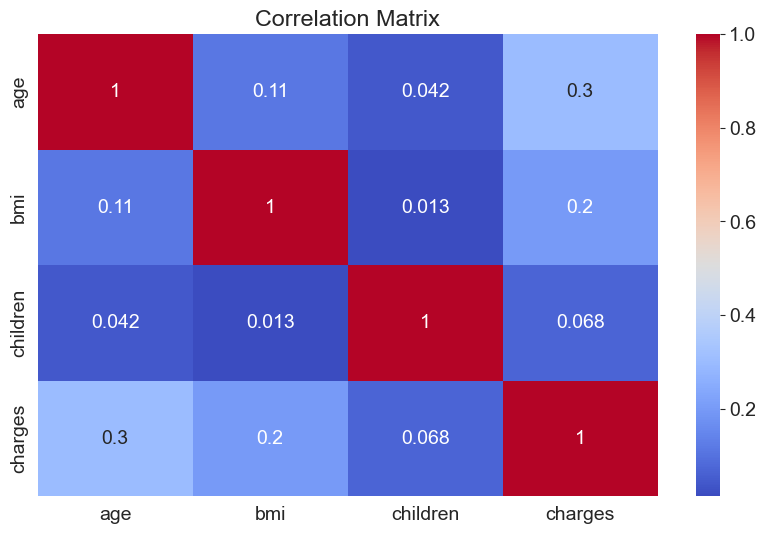

In [69]:
sns.heatmap(medical_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Linear Regression using a Single Feature

In [70]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs Charges for Non-Smokers'}, xlabel='age', ylabel='charges'>

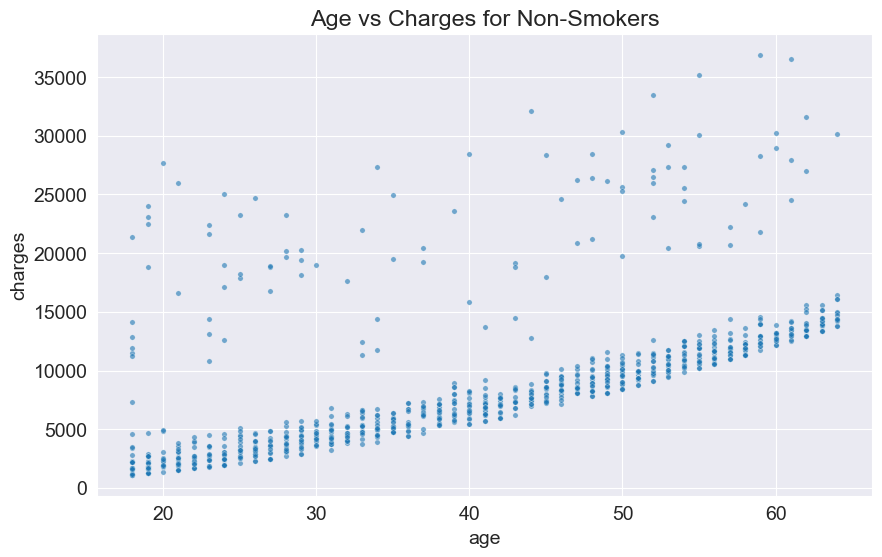

In [71]:
plt.title('Age vs Charges for Non-Smokers')
sns.scatterplot(data=non_smoker_df,x='age',y='charges', alpha=0.6, s=15)

In [107]:
def estimate_charges(age , w ,b):
    return w * age + b

In [108]:
w = 225
b = -1200

In [109]:
ages= non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [110]:
estimated_charges= estimate_charges(ages, w, b)
estimated_charges


1        2850
2        5100
3        6225
4        6000
5        5775
        ...  
1332    10500
1333    10050
1334     2850
1335     2850
1336     3525
Name: age, Length: 1064, dtype: int64

In [111]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

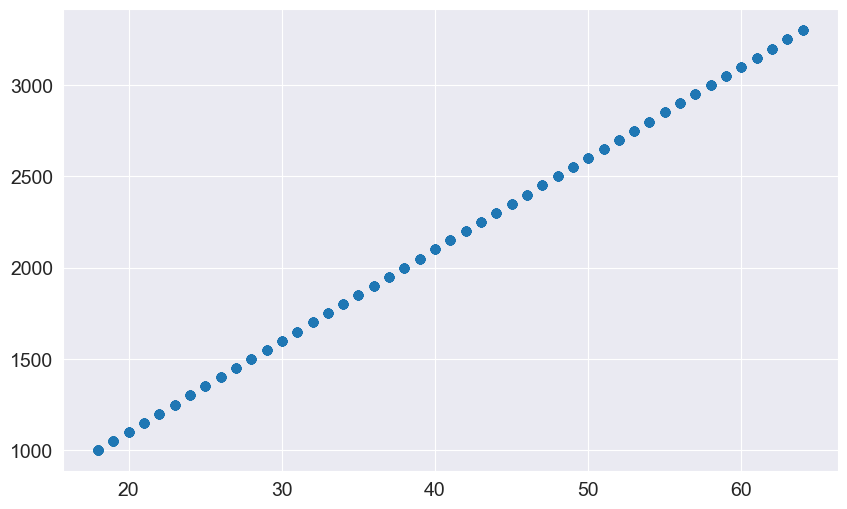

In [90]:
plt.scatter(ages,estimated_charges)

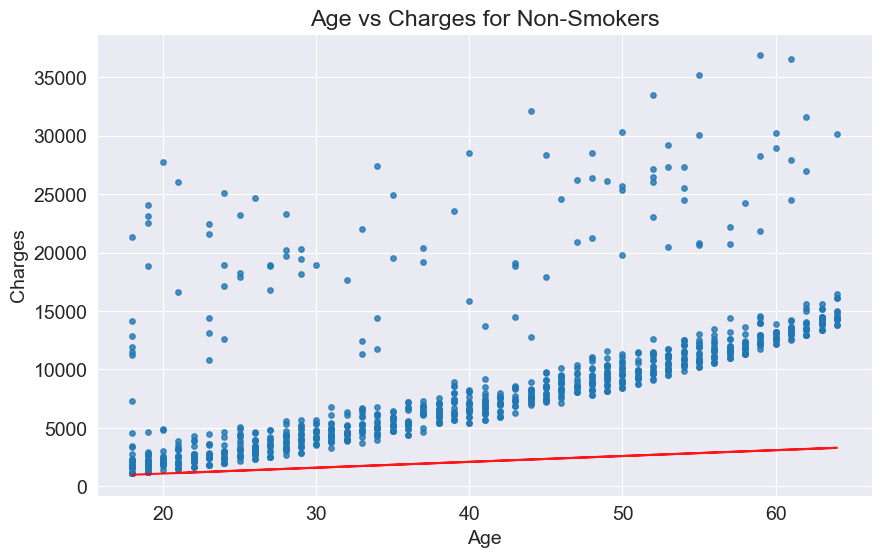

In [92]:
target = non_smoker_df.charges
plt.plot(ages,estimated_charges, 'r', alpha=0.9)
plt.scatter(ages,target, alpha=0.8, s=15)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges for Non-Smokers')
plt.show()

In [93]:
def try_parameters(w,b):
    ages= non_smoker_df.age
    target = non_smoker_df.charges
    estimated_charges = estimate_charges(ages, w, b)
    plt.plot(ages,estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages,target, alpha=0.8, s=15)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
   
    

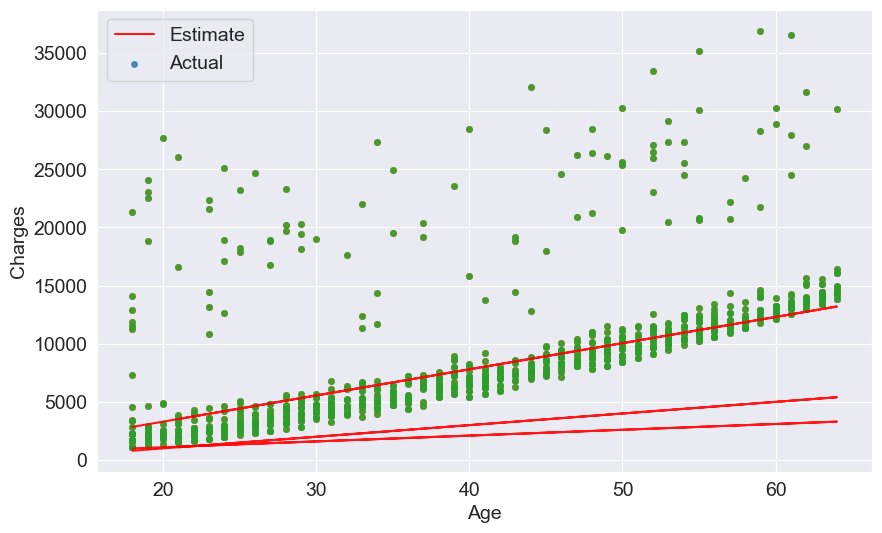

In [106]:
try_parameters(50,100)

try_parameters(100, -1000)
try_parameters(225, -1200)


In [113]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [114]:
predictions = estimated_charges
predictions

1        2850
2        5100
3        6225
4        6000
5        5775
        ...  
1332    10500
1333    10050
1334     2850
1335     2850
1336     3525
Name: age, Length: 1064, dtype: int64

In [116]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [117]:
w = 50
b = 100

In [118]:
targest = non_smoker_df.charges
predictions = estimate_charges(non_smoker_df.age, w, b)

In [120]:
rmse(targets, predictions)

np.float64(8461.949562575493)

In [123]:
def try_parameters(w,b):
    ages= non_smoker_df.age
    target = non_smoker_df.charges
    predictions= estimate_charges(ages, w, b)
    plt.plot(ages,predictions, 'r', alpha=0.9)
    plt.scatter(ages,target, alpha=0.8, s=15)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual'])
    loss = rmse(target, predictions)
    print('RMSE: ', loss)

    

RMSE:  8461.949562575493


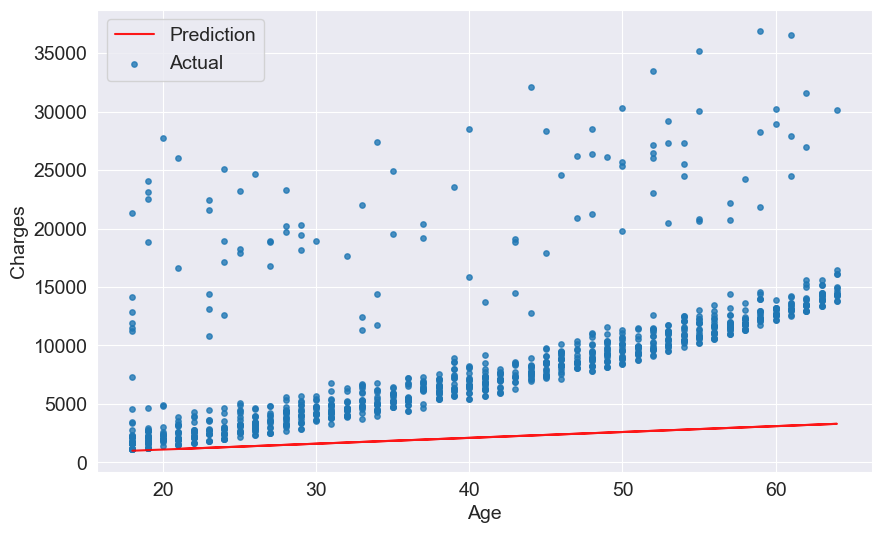

In [124]:
try_parameters(50,100)

RMSE:  4780.589521924819


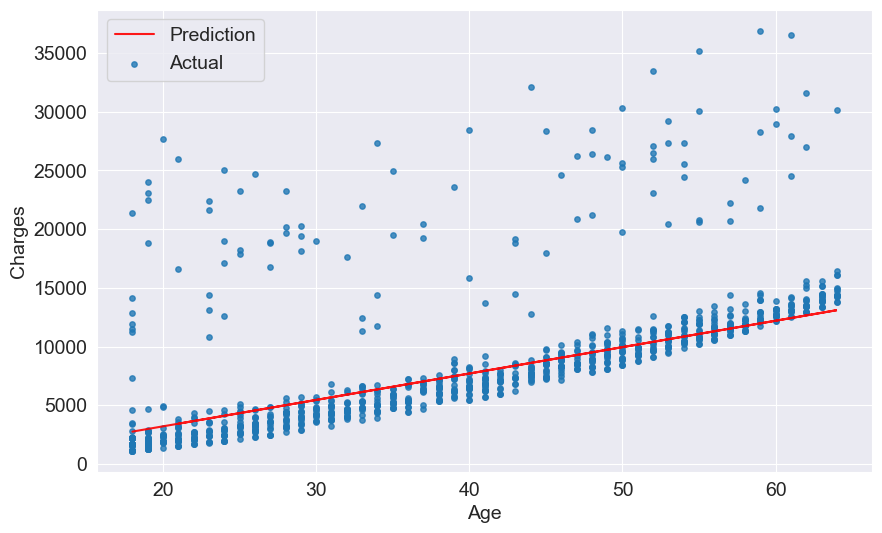

In [126]:
try_parameters(225, -1300)

# Optimizer
### Ordinary Least Square - for small datasets
### Stochastic gradient descent - for large datasets

# Scikit - Learn

In [143]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [144]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [145]:
inputs = non_smoker_df[['age']]
target = non_smoker_df.charges
print('input.shape: ', inputs.shape)
print('target.shape: ', target.shape)

input.shape:  (1064, 1)
target.shape:  (1064,)


In [146]:
model.fit(inputs, target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [147]:
model.predict(np.array([[40],
                        [60],
                        [80]

                        ]))

/Users/muhammadhassansaleem/Documents/medical_expenses_predictor/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 8598.53595668, 13943.51421331, 19288.49246993])

In [148]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [149]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [150]:
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [151]:
rmse(target, predictions)

np.float64(4662.505766636395)

In [137]:
# w
model.coef_[0]

np.float64(267.24891283119945)

In [152]:

# b 
model.intercept_

np.float64(-2091.4205565650773)

RMSE:  4662.505766636395


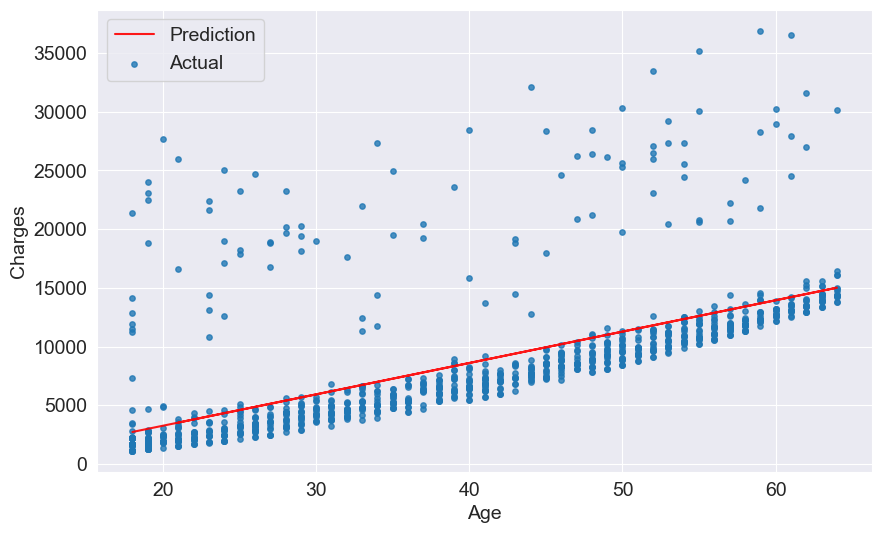

In [158]:
try_parameters(model.coef_[0], model.intercept_)

In [159]:
# Create inputs and target for all data
imputs, target = non_smoker_df[['age']], non_smoker_df.charges

# Create and train the model
model = LinearRegression().fit(imputs, target)

# Generate predictions
predictions = model.predict(imputs)

#Compute loss to evaluate the model
loss = rmse(target, predictions)
print('RMSE: ', loss)

RMSE:  4662.505766636395
